# Chapter 2

Example used in second part of chapter is called the globe tossing experiment. The goal is to estimate the proportion of Earth's surface that's covered in water. We toss the globe high up into the air and make it spin rapidly, so that when we catch it it's orientation does not depend at all on it's previous orientation. We mark 'W' if our index finger lands on water, or 'L' if it marks land. We observe the sequence W L W W W L W L W.

We choose the binomial distribution to be our likelihood function
$$ Pr(w|n,p) = \frac{n!}{w!(n-w)!}p^w(1-p)^{n-w} $$
where $w$ is the number of 'W' observations in $n$ throws, occurring with probability $p$.

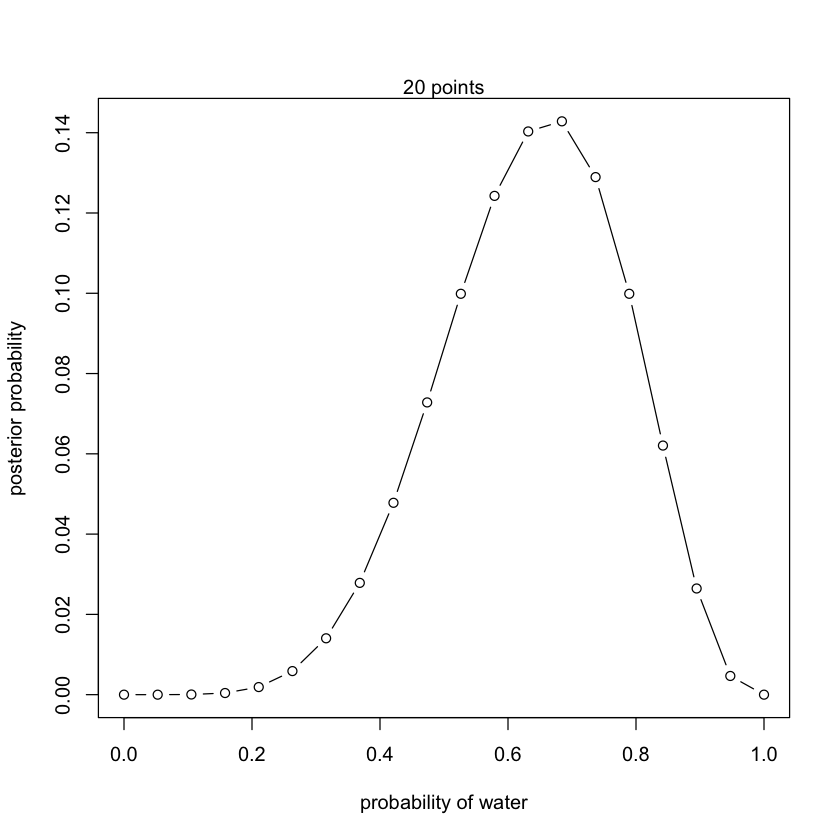

In [14]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- rep( 1, 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 6, size=9, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

## Apply a Quadratic approximation to the globe tossing problem

As the number of parameters increases, the grid-approximation we used above becomes untenable. One way to get around this problem is to use quadratic approximation (page 41).

In [19]:
## Page 42

library(rethinking)
globe.qa <- map(
    alist(
        w ~ dbinom(9,p), # binomial likelihood
        p ~ dunif(0,1)  # uniform prior
    ),
    data=list(w=6) )

# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
p,0.6666667,0.1571338,0.4155366,0.9177968


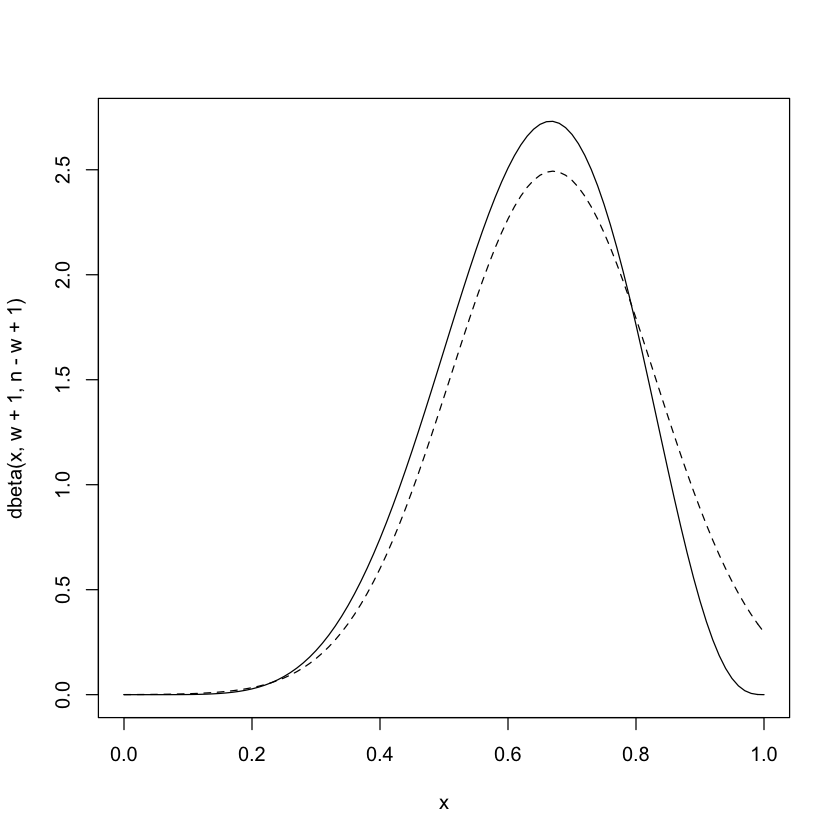

In [40]:
## Page 43
# Compare quadratic approximation to real answer
w <- 6 # number of tosses that land on water
n <- 9 # number of tosses
curve( dbeta( x, w+1, n-w+1), from=0, to=1 )
# quadratic approximation
curve( dnorm( x, 0.67, 0.16 ), lty=2, add=TRUE )

# Practice problems

## 2M1

Compute and plot grid approximations of the posterior distributions for each set of observations. Assume uniform prior.

    1. WWW
    2. WWWL
    3. LWWLWWW 

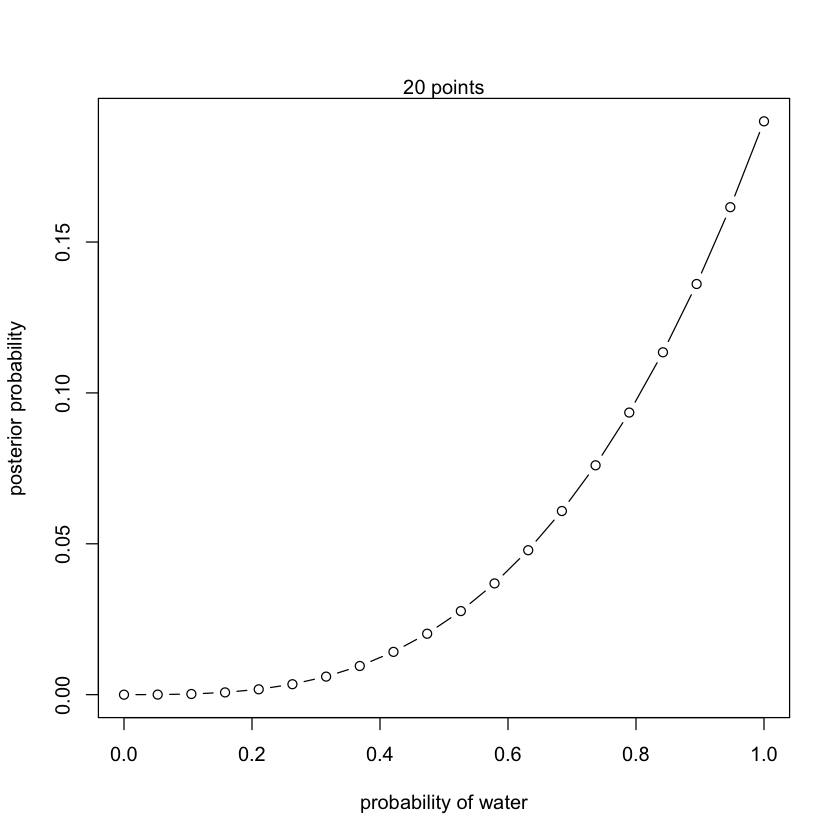

In [41]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- rep( 1, 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 3, size=3, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

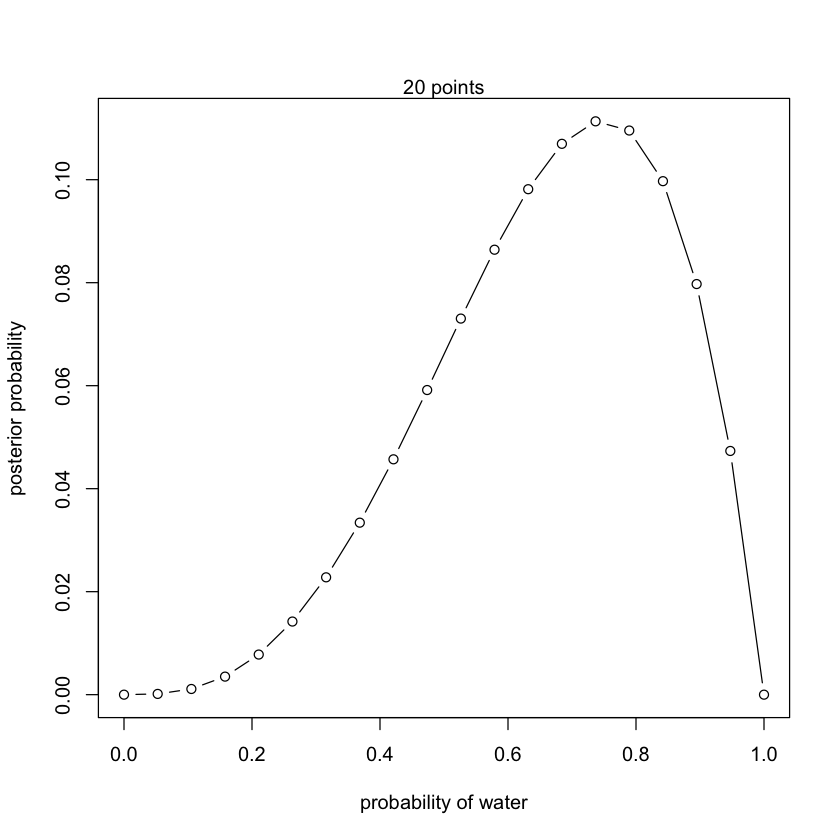

In [42]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- rep( 1, 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 3, size=4, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

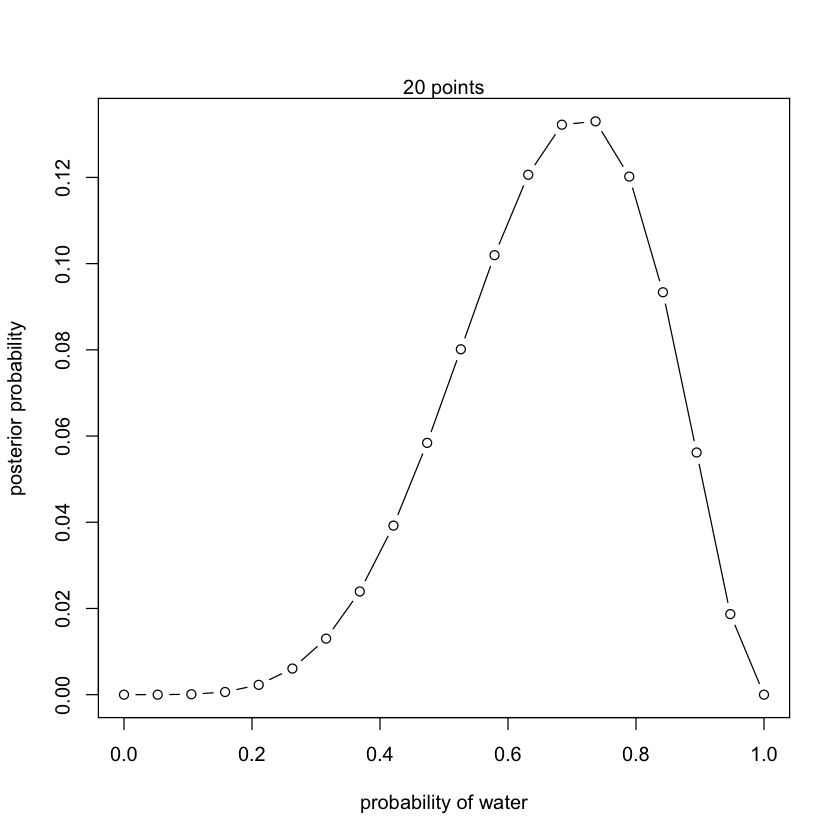

In [43]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- rep( 1, 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 5, size=7, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

## 2M2
Same as 2M1, but assume prior is a step function at $p = 0.5$

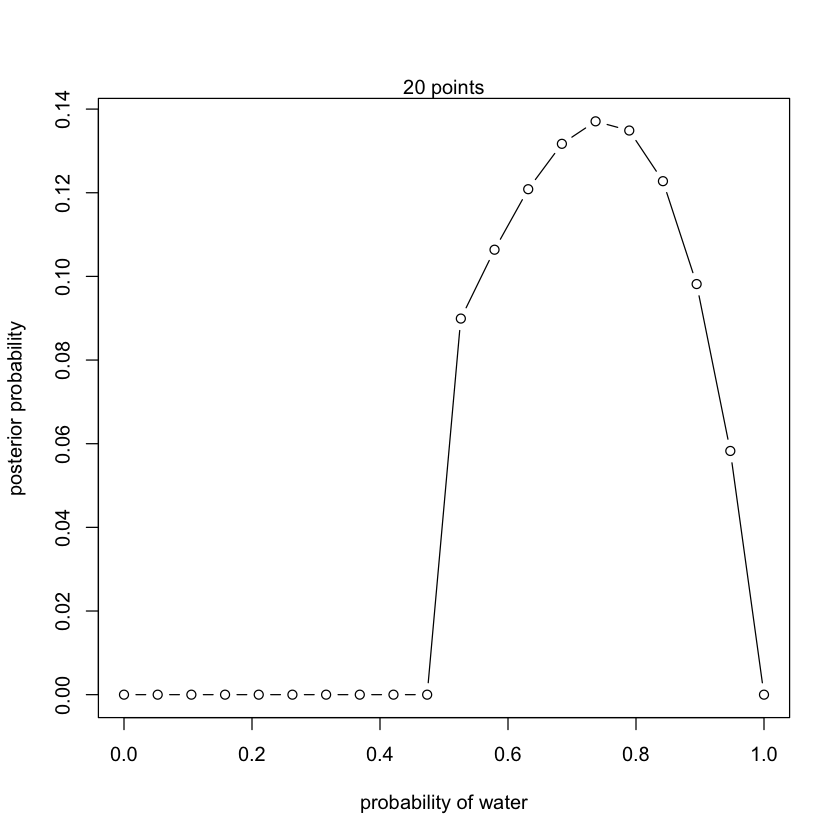

In [48]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- ifelse( p_grid < 0.5, 0, 1 )

# compute likelihood at each value in grid
likelihood <- dbinom( 3, size=4, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

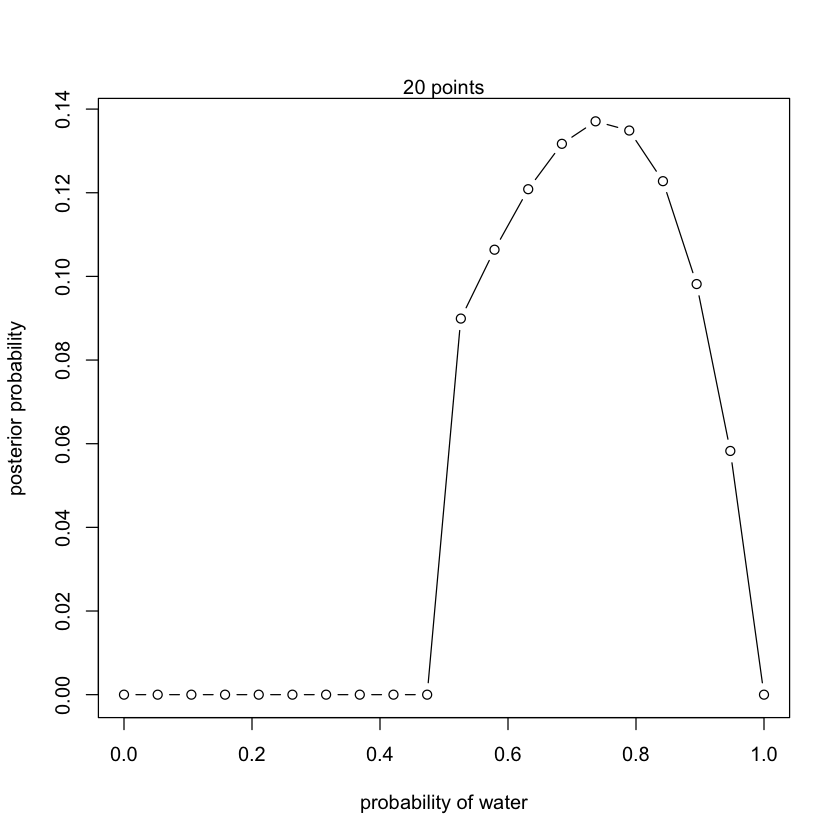

In [46]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- ifelse( p_grid < 0.5, 0, 1 )

# compute likelihood at each value in grid
likelihood <- dbinom( 3, size=4, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

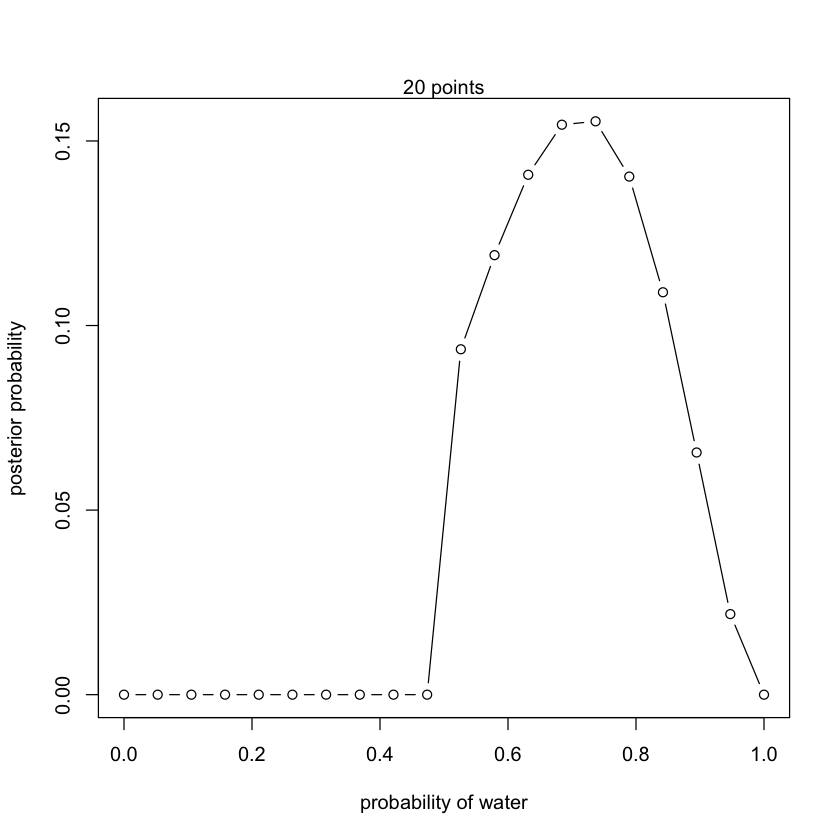

In [47]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- ifelse( p_grid < 0.5, 0, 1 )

# compute likelihood at each value in grid
likelihood <- dbinom( 5, size=7, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

In [1]:
# find posterior for plausibility of each pandas species following the first birth of twins
species.1.likelihood <- .1
species.2.likelihood <- .2
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability next birth is set of twins
posterior[1] * .1 + posterior[2] * .2

[1] 0.1666667

In [8]:
## 2H2
species.1.likelihood <- .1
species.2.likelihood <- .2
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1
posterior[1]

[1] 0.3333333

In [4]:
species.1.likelihood <- .1 * (1 - .1)
species.2.likelihood <- .2 * (1 - .2)
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1
posterior[1]

[1] 0.36

In [7]:
# without birth information
species.1.likelihood <- .8
species.2.likelihood <- 1 - .65
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior.vet.test <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1, given veterinarian test
posterior.vet.test[1]

# with birth information
species.1.likelihood <- .1 * (1 - .1)
species.2.likelihood <- .2 * (1 - .2)
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior.birth.info <- unstandardized.posterior / sum(unstandardized.posterior)
posterior.birth.info

# probability pandas is from species 1, given veterinarian test and birth information
composite.unstandardized.posterior <- posterior.vet.test * posterior.birth.info
composite.posterior <- composite.unstandardized.posterior / sum(composite.unstandardized.posterior)
composite.posterior[1]

[1] 0.6956522

[1] 0.36 0.64

[1] 0.5625